<center><H1> Machine Learning Lab #10

<H3>DATA CLUSTERING K-means

In [1]:
#Generic Imports

import math
import io
import re
import inspect
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
from scipy.sparse import csr_matrix
import seaborn as sns

In [2]:
#Problem specific Import
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

<H2>Questions

1. Consider the following three variables for 20 different basketball players: points, assists, and rebounds.
Perform k-means clustering manually with K=2, using Euclidean distance. Show the working for one iteration
in your Lab Observation Book by using Euclidean distance.


| Points | Assists | Rebounds |
|--------|---------|----------|
| 18.0   | 3.0     | 15       |
| 19.0   | 4.0     | 14       |
| 14.0   | 5.0     | 10       |
| 14.0   | 4.0     | 8        |
| 11.0   | 7.0     | 14       |
| 20.0   | 8.0     | 13       |
| 28.0   | 7.0     | 9        |
| 30.0   | 6.0     | 5        |
| 31.0   | 9.0     | 4        |
| 35.0   | 12.0    | 11       |
| 33.0   | 14.0    | 6        |
| 25.0   | 9.0     | 5        |
| 25.0   | 4.0     | 3        |
| 27.0   | 3.0     | 8        |
| 29.0   | 4.0     | 12       |
| 30.0   | 12.0    | 7        |
| 19.0   | 15.0    | 6        |
| 23.0   | 11.0    | 5        |


In [6]:
data = {
    "Points":[18,19,14,14,11,20,28,30,31,35,33,25,25,27,29,30,19,23,22,24],
    "Assists":[3,4,5,4,7,8,7,6,9,12,14,9,4,3,4,12,15,11,10,13],
    "Rebounds":[15,14,10,8,14,13,9,5,4,11,6,5,3,8,12,7,6,5,7,9]
}
df = pd.DataFrame(data)


In [7]:
#distance metric
def euclidean(a,b): return np.sqrt(np.sum((a-b)**2))
def manhattan(a,b): return np.sum(np.abs(a-b))
def minkowski(a,b,p=3): return np.sum(np.abs(a-b)**p)**(1/p)

In [8]:
# K-means implementation
def kmeans(X, K, dist_func, max_iters=100):
    np.random.seed(42)
    centroids = X[np.random.choice(len(X), K, replace=False)]
    for _ in range(max_iters):
        labels = np.array([np.argmin([dist_func(x,c) for c in centroids]) for x in X])
        new_centroids = np.array([X[labels==k].mean(axis=0) for k in range(K)])
        if np.allclose(centroids, new_centroids): break
        centroids = new_centroids
    sse = sum([dist_func(X[i], centroids[labels[i]])**2 for i in range(len(X))])
    return labels, centroids, sse

In [9]:
# Wrapper function
def run_kmeans_for_metric(X, dist_func, name="Metric"):
    sse_list = []
    for K in range(1,5):
        labels, centroids, sse = kmeans(X, K, dist_func)
        sse_list.append(sse)
        # Plot clusters (2D projection: Points vs Assists)
        plt.figure()
        for k in range(K):
            plt.scatter(X[labels==k,0], X[labels==k,1], label=f"Cluster {k+1}")
        plt.scatter(centroids[:,0], centroids[:,1], c='black', marker='X', s=200, label="Centroids")
        plt.title(f"{name} - K={K}")
        plt.xlabel("Points"); plt.ylabel("Assists")
        plt.legend()
        plt.show()
    # Elbow plot
    plt.figure()
    plt.plot(range(1,5), sse_list, marker='o')
    plt.title(f"Elbow Method ({name})")
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("SSE")
    plt.show()
    # SSE table
    print(f"\nSSE Table for {name}:")
    print(pd.DataFrame({"K":[1,2,3,4],"SSE":sse_list}))

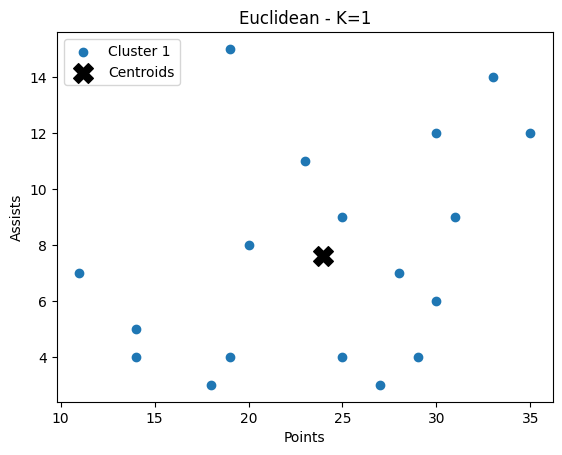

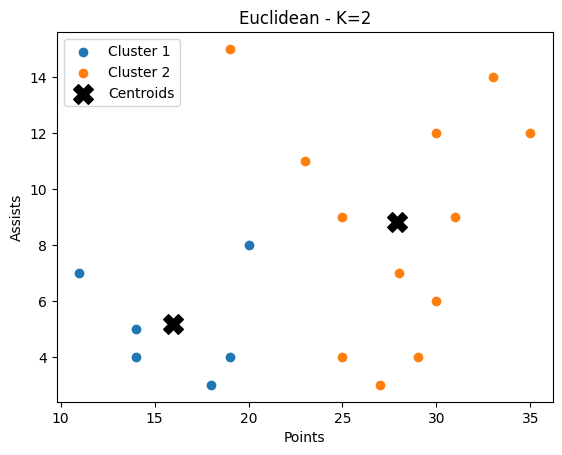

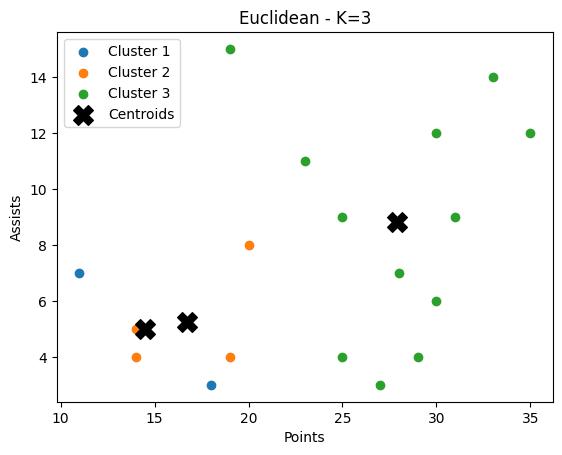

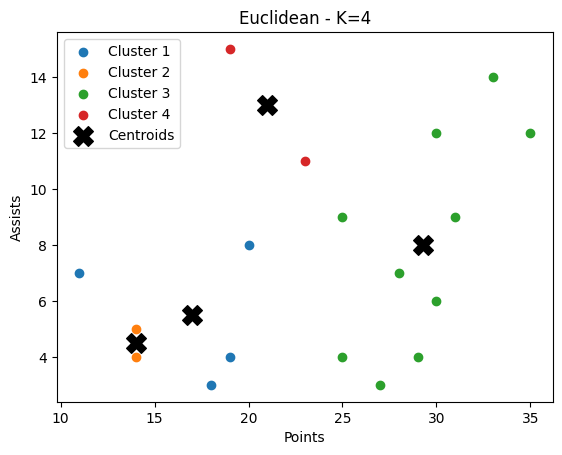

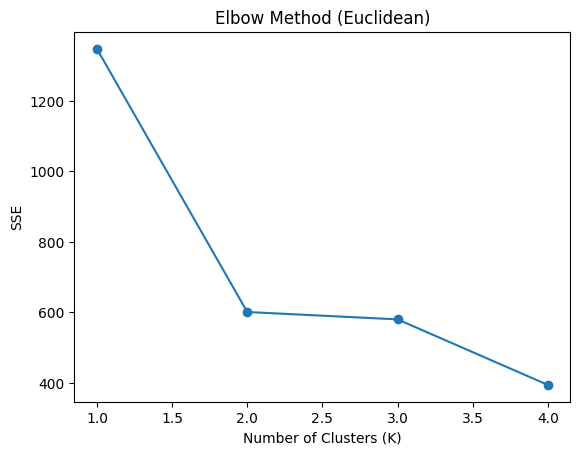


SSE Table for Euclidean:
   K          SSE
0  1  1347.500000
1  2   601.000000
2  3   580.083333
3  4   394.100000


In [ ]:
     run_kmeans_for_metric(X, euclidean, "Euclidean")

2. Redo 1(a)-1(d) using Manhattan distance.

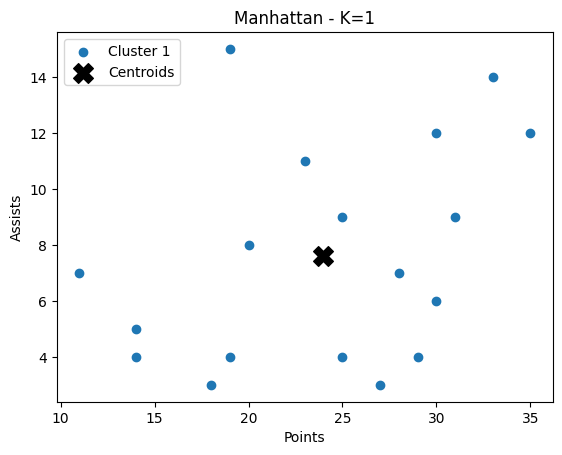

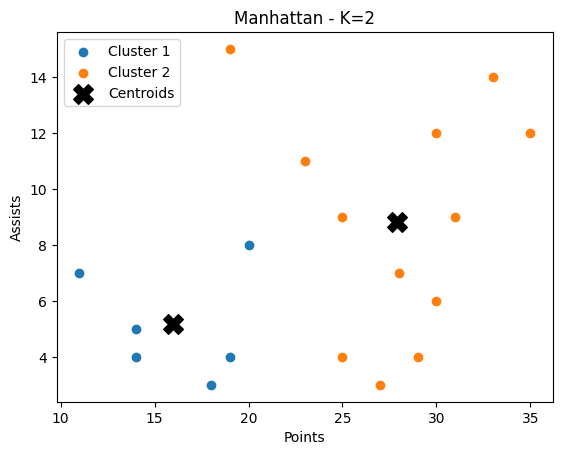

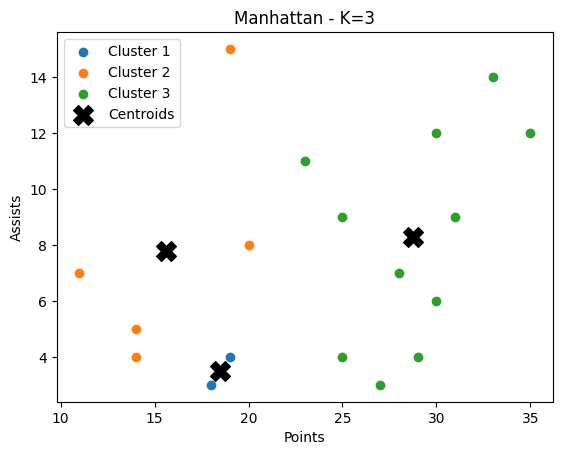

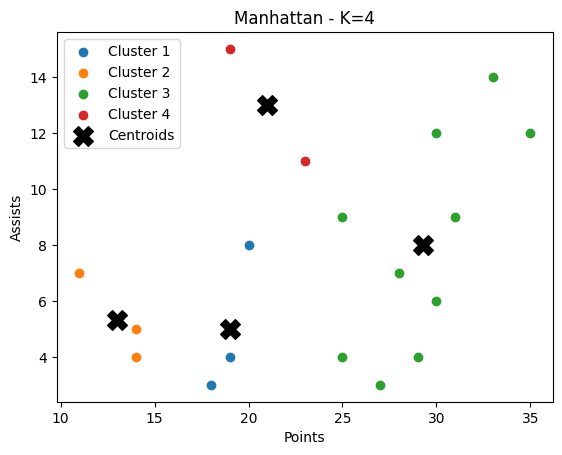

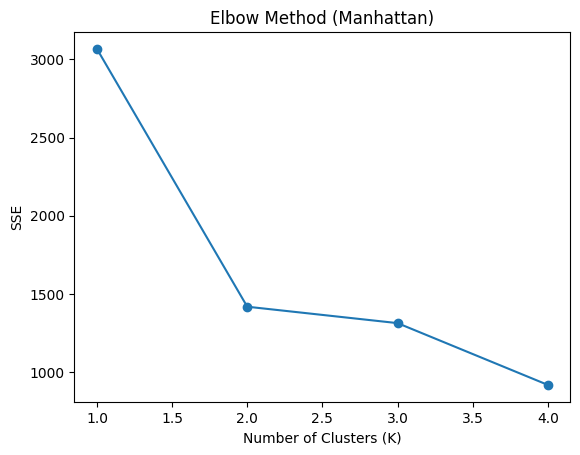


SSE Table for Manhattan:
   K          SSE
0  1  3066.845679
1  2  1418.055556
2  3  1313.083140
3  4   917.800000


In [11]:
run_kmeans_for_metric(X, manhattan, "Manhattan")


3. Redo 1(a)-1(d) using Minkowski distance.

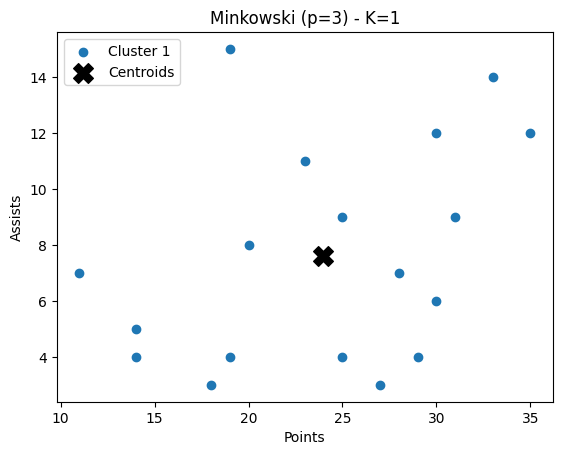

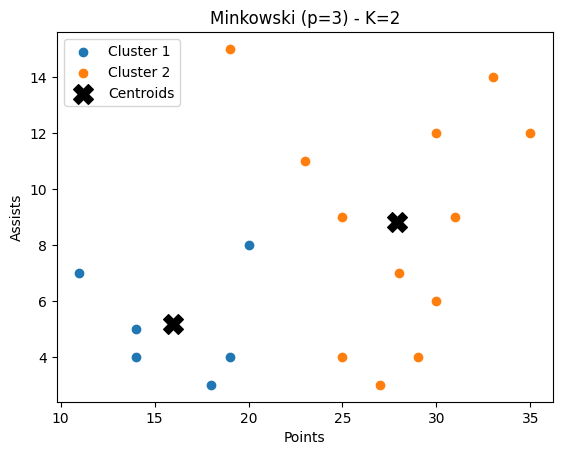

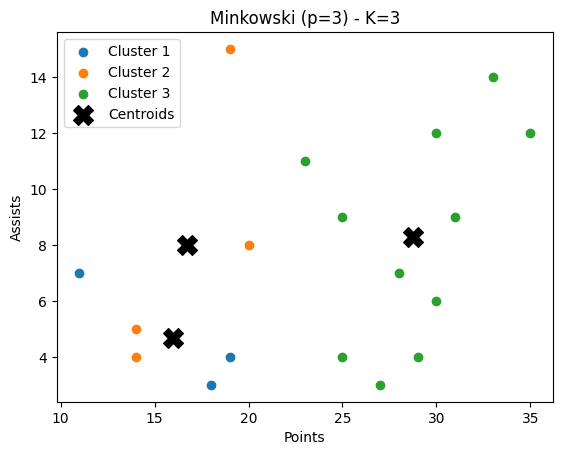

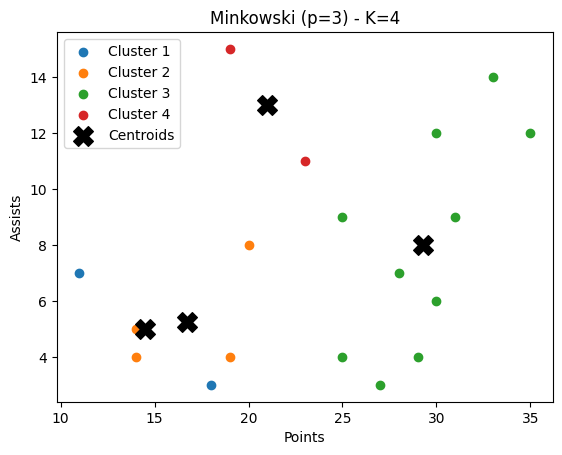

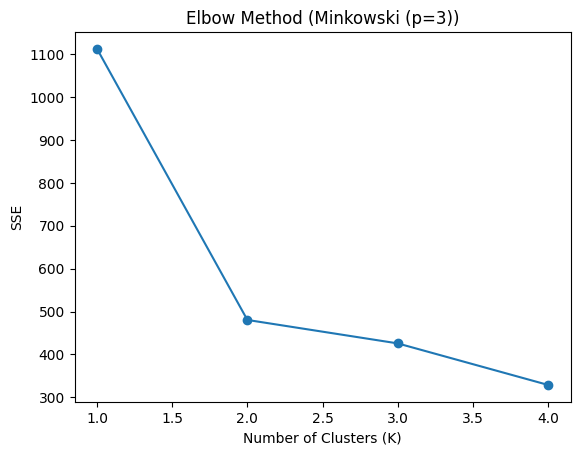


SSE Table for Minkowski (p=3):
   K          SSE
0  1  1112.276058
1  2   480.505973
2  3   425.881641
3  4   329.055709


In [12]:
run_kmeans_for_metric(X, lambda a,b: minkowski(a,b,p=3), "Minkowski (p=3)")

---